In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head(2) #head(n) => displays n top rows. by default n=5. .tail(n) for last n rows

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1


In [4]:
train_data.describe() #only continuous columns info is displayed 
#train_data['age'].value_counts()

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,73147.000000,73147.000000,73147.000000,73147.000000,45418.000000,73147.000000,73070.000000,73147.000000
mean,128.208676,91.079306,9843.079620,2.246845,36.494033,2.583934,2.395634,0.695408
std,6.889679,51.239048,5703.556093,1.011587,9.041119,1.240816,1.325288,0.460238
min,117.000000,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,0.000000
25%,121.000000,45.000000,5040.000000,1.000000,28.000000,2.000000,1.000000,0.000000
50%,131.000000,90.000000,9641.000000,2.000000,39.000000,2.000000,2.000000,1.000000
75%,134.000000,135.000000,14552.000000,3.000000,45.000000,3.000000,4.000000,1.000000
max,136.000000,187.000000,20098.000000,4.000000,63.000000,14.000000,5.000000,1.000000


In [5]:
train_data.dtypes

id                            object
program_id                    object
program_type                  object
program_duration               int64
test_id                        int64
test_type                     object
difficulty_level              object
trainee_id                     int64
gender                        object
education                     object
city_tier                      int64
age                          float64
total_programs_enrolled        int64
is_handicapped                object
trainee_engagement_rating    float64
is_pass                        int64
dtype: object

In [6]:
train_data.columns

Index(['id', 'program_id', 'program_type', 'program_duration', 'test_id',
       'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating', 'is_pass'],
      dtype='object')

In [7]:
train_data.index

RangeIndex(start=0, stop=73147, step=1)

# Data Visualization (using matplotlib.pyplot)

## 1. Line Chart

In [8]:
# using inline plot
mean_age_by_program_type = train_data.groupby('program_type').age.mean()

In [9]:
x = mean_age_by_program_type.index.tolist()
y = mean_age_by_program_type.values.tolist()

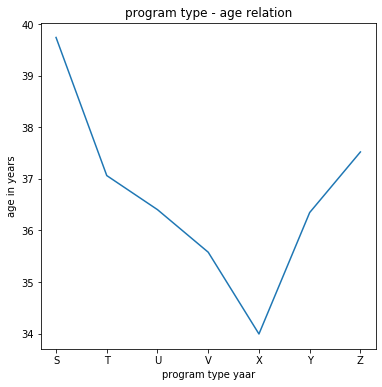

In [10]:
plt.figure(figsize=(6,6))
plt.title('program type - age relation')
plt.xlabel('program type yaar')
plt.ylabel('age in years')
#plt.xticks(labels=x, ticks=np.arange(len(x)))
plt.plot(x, y)

## 2. Bar Chart (for categorical variable)

<BarContainer object of 7 artists>

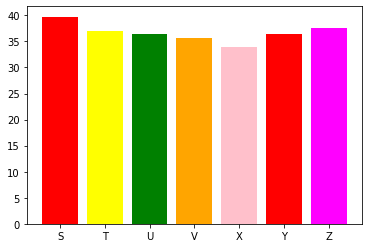

In [11]:
plt.bar(x,y, color=['red', 'yellow', 'green', 'orange', 'pink', 'red', 'magenta']) # colors is optional

## 3. Histogram (for Continous Variable)

(array([25595.,     0.,     0.,     0.,     0., 17234.,     0.,     0.,
            0.,     0., 11553.,     0.,     0.,     0.,     0., 13113.,
            0.,     0.,     0.,  5575.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4,
        3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <a list of 20 Patch objects>)

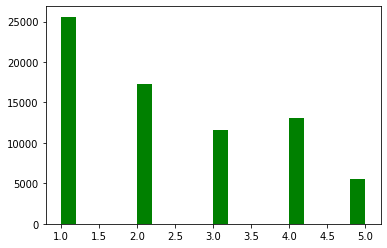

In [12]:
plt.hist(train_data['trainee_engagement_rating'], bins=20, color='green')

## 4. Box plot (for both cat and cont variables)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1b34ab10>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1b8cb610>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1b33ae90>,
 'medians': [<matplotlib.lines.Line2D at 0x1a1b34abd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1b300f50>,
 'means': []}

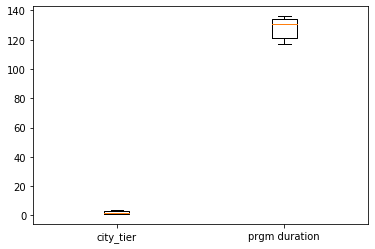

In [13]:
target_value = train_data[['city_tier', 'program_duration']]
red_diamond = dict(markerfacecolor='r', marker='D')
fig, ax = plt.subplots()
plt.boxplot(target_value.values, labels=['city_tier', 'prgm duration'], flierprops=red_diamond)

## 5. Violin plot (for knowing density)

{'bodies': [<matplotlib.collections.PolyCollection at 0x1a1b94c590>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1a1b317d10>,
 'cmins': <matplotlib.collections.LineCollection at 0x1a1b94c9d0>,
 'cbars': <matplotlib.collections.LineCollection at 0x1a1b94ced0>}

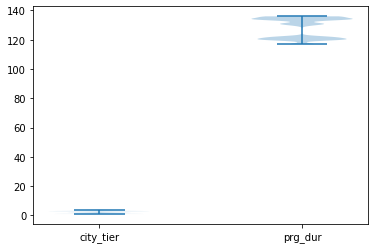

In [14]:
#plt.subplots() for multiple plots
plt.xticks(ticks=[1,2], labels=['city_tier', 'prg_dur'])
plt.violinplot(target_value.values) # used for knowing density

## 6. Scatter plot (between two continous variables)

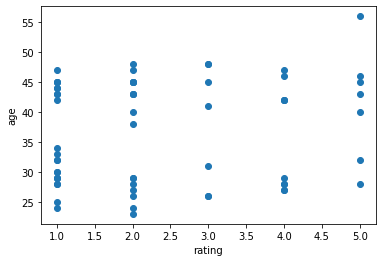

In [15]:
plt.xlabel("rating")
plt.ylabel("age")
plt.scatter(train_data['trainee_engagement_rating'][:100],train_data['age'][:100]) # performing on subset of data

## 7. Bubble plot (for analysiing 3 variables)

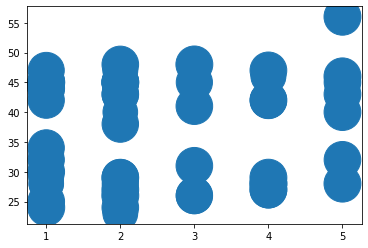

In [16]:
plt.scatter(train_data['trainee_engagement_rating'][:100],train_data['age'][:100], s=train_data['program_duration']*10)
#s is the size of third column

# Data Visualization (using seaborn)

## 1.Line chart

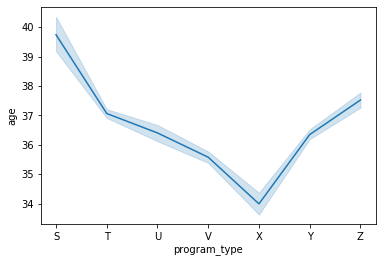

In [17]:
sns.lineplot(data=train_data, x='program_type', y='age')

## 2. Bar chart

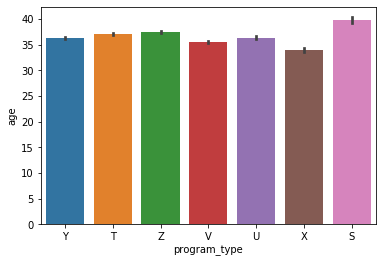

In [18]:
sns.barplot(data=train_data, x='program_type', y='age') #mtplotlib need explicit color declrtn

## 3. histogram

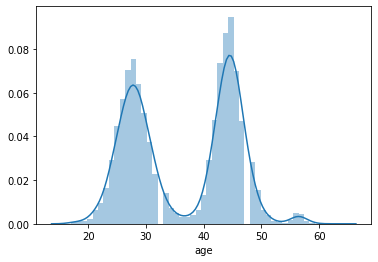

In [19]:
sns.distplot(train_data['age'])

## 4. Box plot

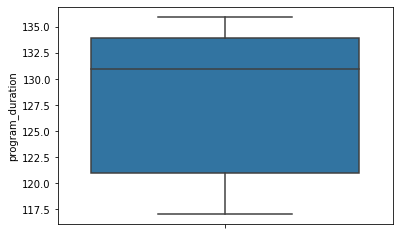

In [20]:
sns.boxplot(train_data['program_duration'], orient='vertical')

## 5. violin plot

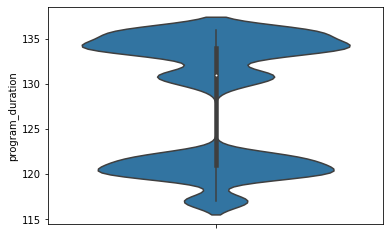

In [21]:
sns.violinplot(train_data['program_duration'], orient='vertical')

## 6. Scatter plot

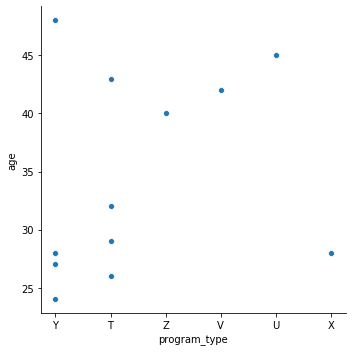

In [22]:
sns.relplot(x='program_type', y='age', data=train_data[:25], kind='scatter')

## 7. Hue Semantic

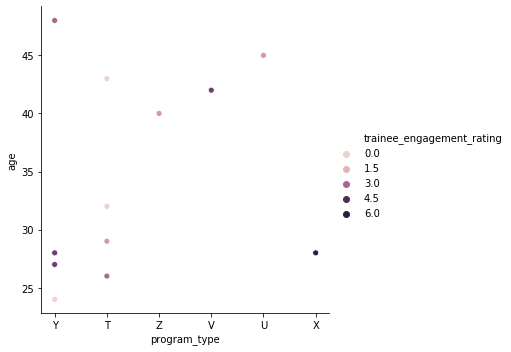

In [23]:
sns.relplot(x='program_type', y='age', hue='trainee_engagement_rating', data=train_data[:25])

# Model Creation

In [24]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor #import XGBClassifier
#from metrics import roc_auc